In [32]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
from sklearn.preprocessing import LabelEncoder 

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
import lxml
#from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [33]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [34]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [35]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [36]:
phish_data.isnull().sum() 

URL      0
Label    0
dtype: int64

In [37]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [38]:
print(label_counts.columns)

Index(['count'], dtype='object')


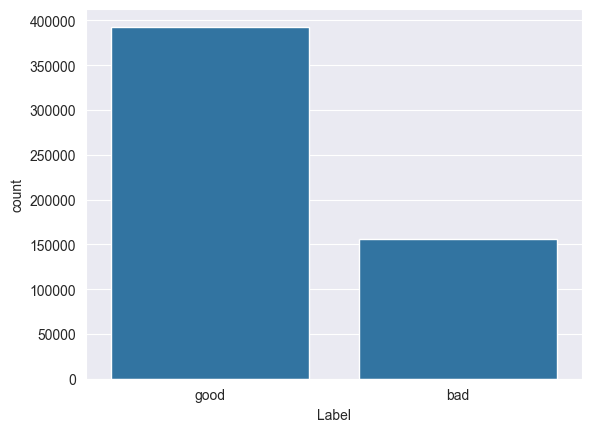

In [39]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts, x='Label', y='count')
plt.show()

In [40]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [41]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [42]:
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [43]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.7619849999900907 sec


In [44]:
phish_data.sample(5)

,URL,Label,text_tokenized
268930,acadweb.wwu.edu/cpnws/buswell/buswellaudio.htm,good,"[acadweb, wwu, edu, cpnws, buswell, buswellaud..."
435845,spoke.com/info/p80lFtF/JeanCrowder,good,"[spoke, com, info, p, lFtF, JeanCrowder]"
414238,pinkpornstars.com/search/?q=%22Lara+Roxx%22&kw...,good,"[pinkpornstars, com, search, q, Lara, Roxx, kw..."
496931,artigianasalumi.com/09uhv65hg,bad,"[artigianasalumi, com, uhv, hg]"
447051,thumbtack.com/ca/foothill-ranch/tennis-lessons...,good,"[thumbtack, com, ca, foothill, ranch, tennis, ..."


In [45]:
stemmer = SnowballStemmer("english") # choose a language

In [46]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 29.661285699985456 sec


In [47]:
lb = LabelEncoder()
phish_data['Label'] = lb.fit_transform(phish_data['Label'])

In [48]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
240540,softreflex.com/softdownload_marco+calliari+we+...,1,"[softreflex, com, softdownload, marco, calliar...","[softreflex, com, softdownload, marco, calliar..."
270984,albianews.com/news/,1,"[albianews, com, news]","[albianew, com, news]"
95152,www.angelfire.com/games/pokemon199/index.html,1,"[www, angelfire, com, games, pokemon, index, h...","[www, angelfir, com, game, pokemon, index, html]"
205859,krty.tunegenie.com/,1,"[krty, tunegenie, com]","[krti, tunegeni, com]"
219739,names.whitepages.com/tennessee/last/demonbreun,1,"[names, whitepages, com, tennessee, last, demo...","[name, whitepag, com, tennesse, last, demonbreun]"


In [49]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.19724019995192066 sec


In [50]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
133295,adozkaymak.com.tr/new2015/document.php,0,"[adozkaymak, com, tr, new, document, php]","[adozkaymak, com, tr, new, document, php]",adozkaymak com tr new document php
25698,www.childswork.net/~amfaceli/webscr.php,0,"[www, childswork, net, amfaceli, webscr, php]","[www, childswork, net, amfac, webscr, php]",www childswork net amfac webscr php
471518,youtube.com/watch?v=7PlIszWSBGg,1,"[youtube, com, watch, v, PlIszWSBGg]","[youtub, com, watch, v, pliszwsbgg]",youtub com watch v pliszwsbgg
431898,skyscrapercity.com/archive/index.php/t-578306....,1,"[skyscrapercity, com, archive, index, php, t, ...","[skyscraperc, com, archiv, index, php, t, html]",skyscraperc com archiv index php t html
110397,alexsandroleiloes.com.br/admin/beats/verificat...,0,"[alexsandroleiloes, com, br, admin, beats, ver...","[alexsandroleilo, com, br, admin, beat, verif,...",alexsandroleilo com br admin beat verif folder...


In [54]:
bad_sites = phish_data[phish_data.Label == 0]
good_sites = phish_data[phish_data.Label == 1]

In [55]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,0,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,0,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [56]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,1,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,1,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,1,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,1,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,1,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [57]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [58]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

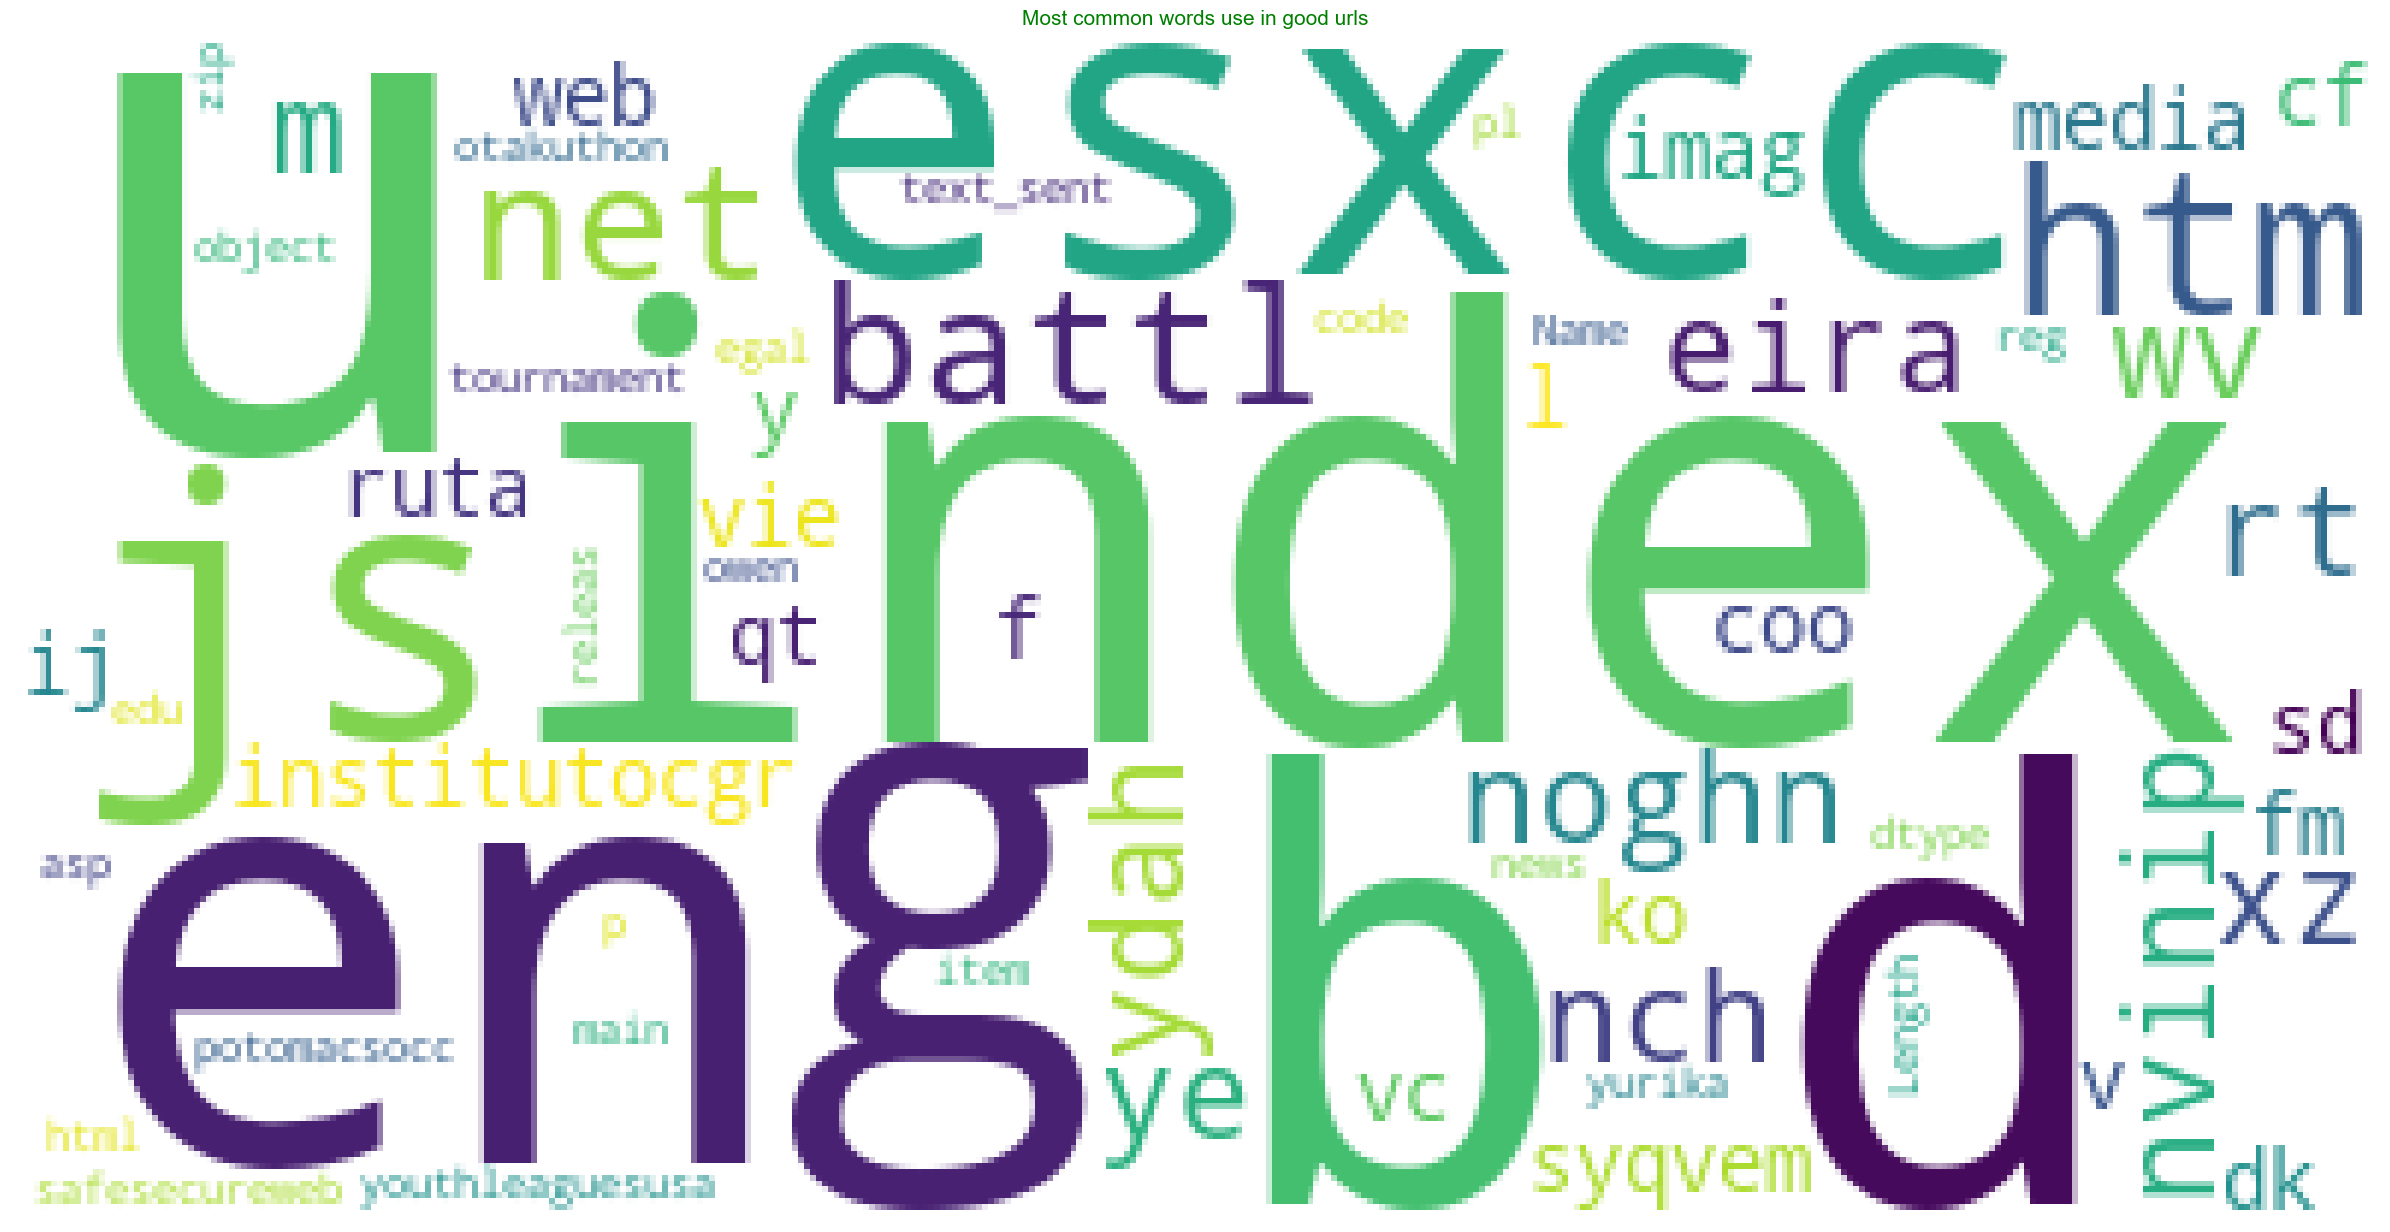

In [59]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [60]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

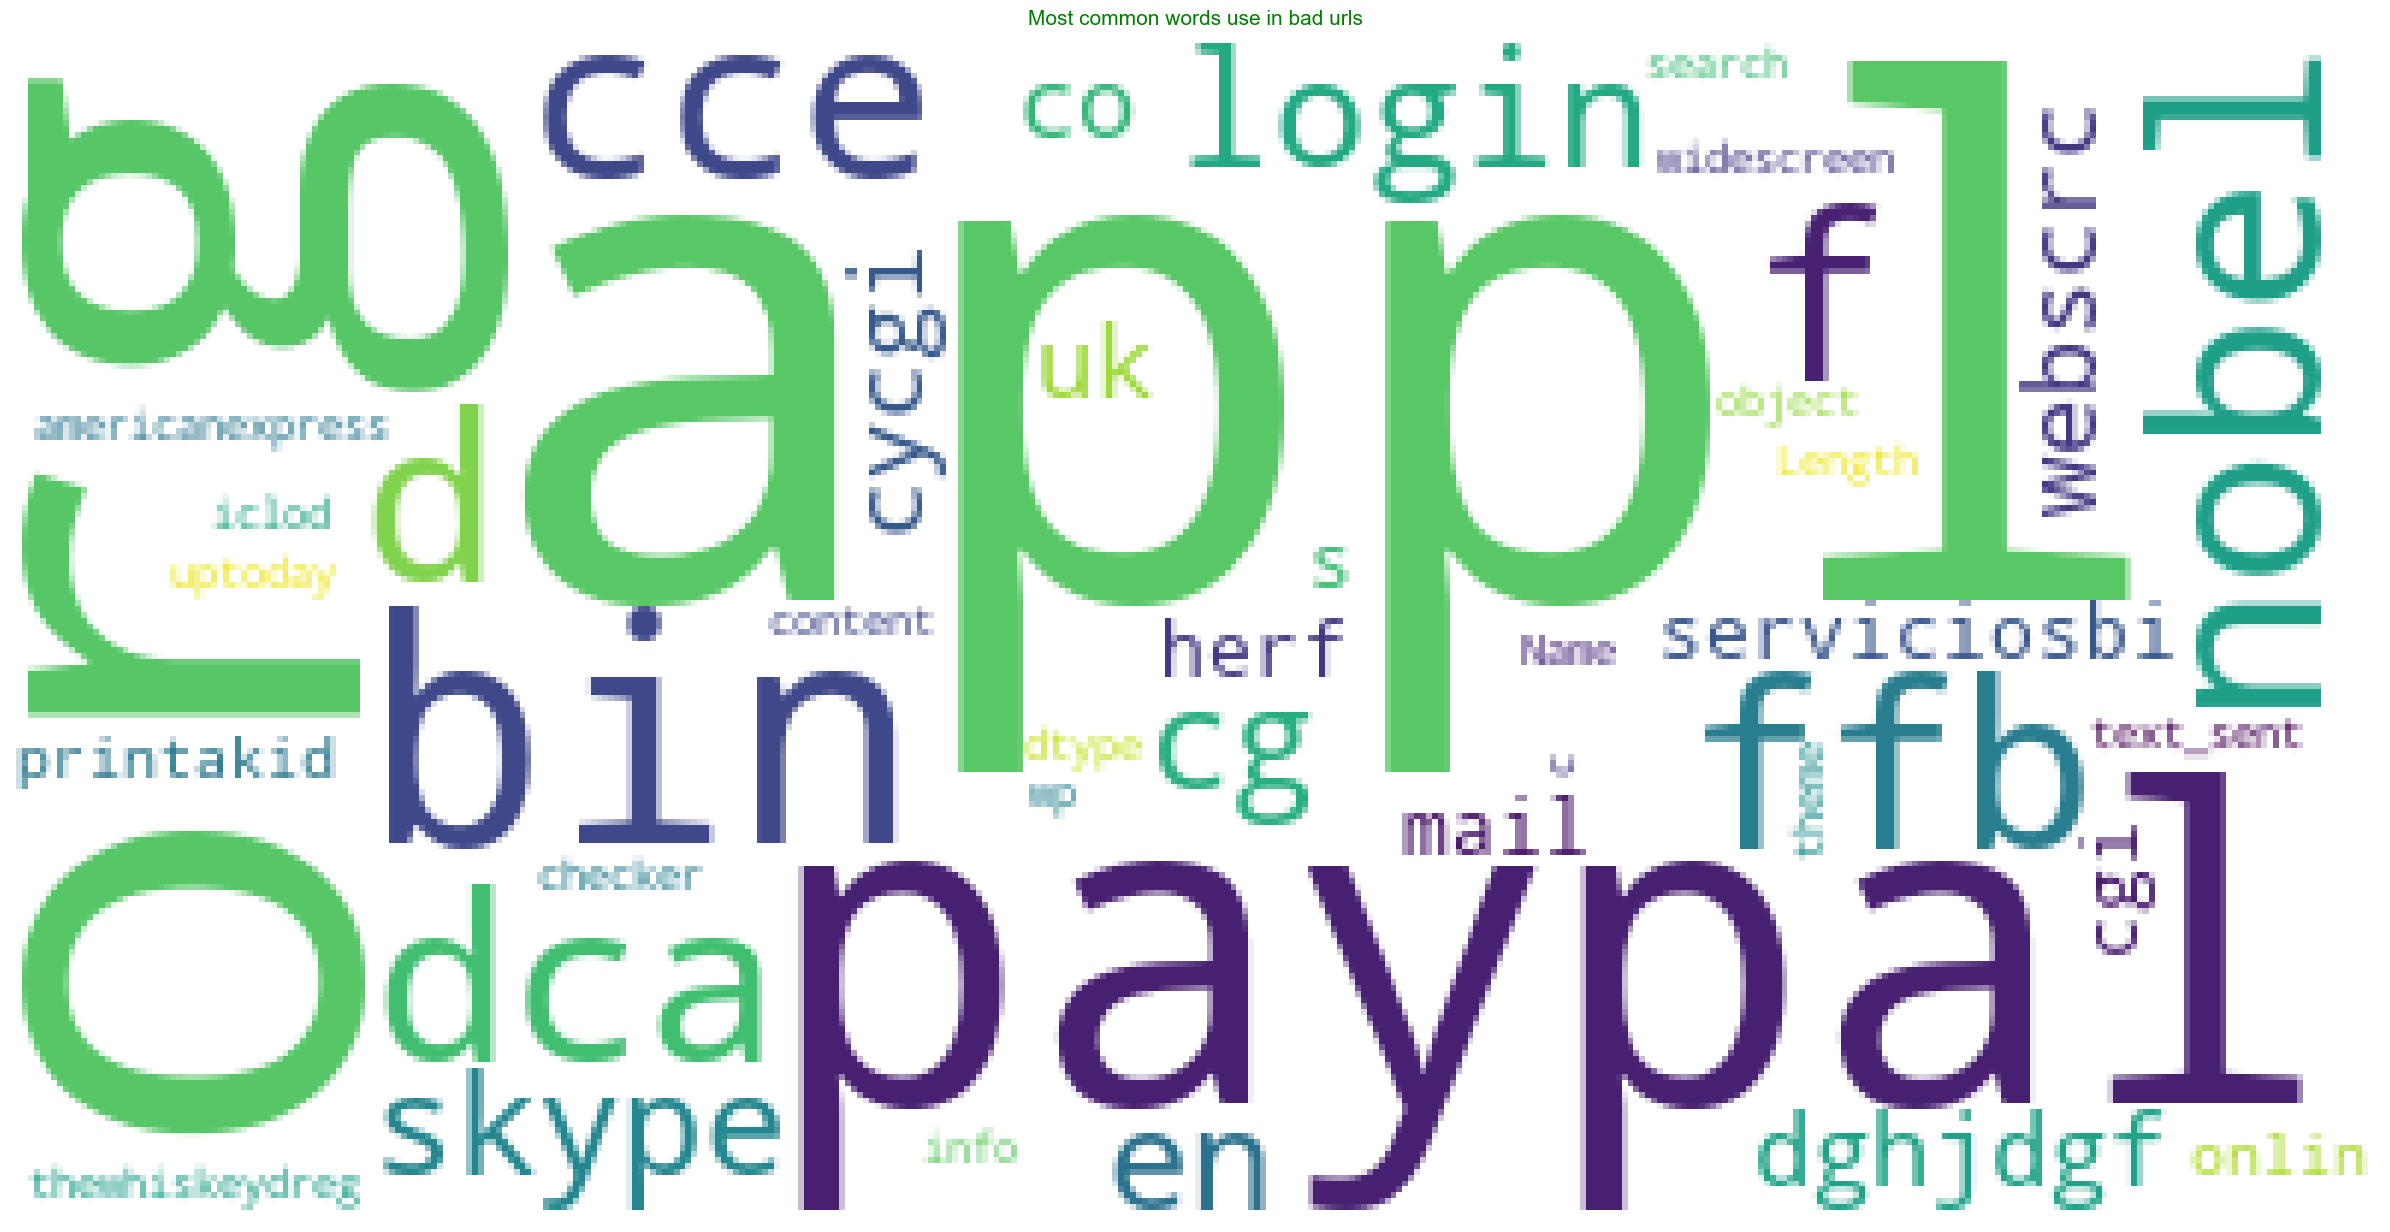

In [61]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [62]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
49437,www.jazzdepot.com/index.html,1,"[www, jazzdepot, com, index, html]","[www, jazzdepot, com, index, html]",www jazzdepot com index html
238502,sg.finance.yahoo.com/q?s=CINF,1,"[sg, finance, yahoo, com, q, s, CINF]","[sg, financ, yahoo, com, q, s, cinf]",sg financ yahoo com q s cinf
506161,catlong.com/jhg45sl/,0,"[catlong, com, jhg, sl]","[catlong, com, jhg, sl]",catlong com jhg sl
249658,travelcode.org/,1,"[travelcode, org]","[travelcod, org]",travelcod org
466245,worldquestorlando.com/,1,"[worldquestorlando, com]","[worldquestorlando, com]",worldquestorlando com


In [63]:
#create cv object
cv = CountVectorizer()

In [64]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [65]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(feature, phish_data.Label)

In [67]:
def apply_model(model,x_train,x_test,y_train,y_test,create_heatmap=True):
    try:
        model.fit(x_train, y_train)  # Fit the model
    except Exception as e:
        print(f"Error fitting the model: {e}")
        return  # Exit the function early in case of errors

    ypred = model.predict(x_test)  # Make predictions on the test set

    print('Predictions\n', ypred)
    print('Training Score', model.score(x_train, y_train))
    print('Testing Score', model.score(x_test, y_test))

    cm = confusion_matrix(y_test, ypred)
    print('Confusion Matrix\n', cm)
    print('Classification Report\n', classification_report(y_test, ypred))

    # Optional heatmap creation (add create_heatmap parameter to the function signature)
    #create_heatmap = False  # Set this to True if you want the heatmap
    if create_heatmap:
        plt.clf()
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
        plt.show()

Predictions
 ['good' 'bad' 'good' ... 'good' 'bad' 'good']
Training Score 0.9998786434276921
Testing Score 0.9641247442422654
Confusion Matrix
 [[37192  2137]
 [ 2790 95218]]
Classification Report
               precision    recall  f1-score   support

         bad       0.93      0.95      0.94     39329
        good       0.98      0.97      0.97     98008

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.96      0.96      0.96    137337



<Figure size 640x480 with 0 Axes>

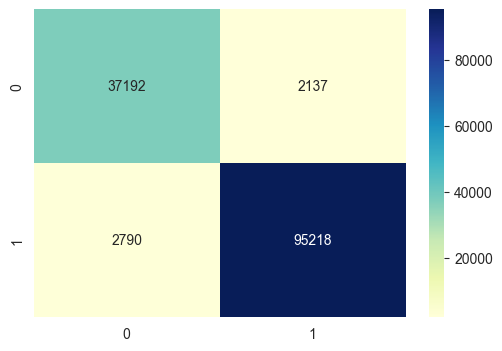

In [32]:
# DT
dt = DecisionTreeClassifier()#criterion='entropy',max_depth=8,min_samples_split=12
apply_model(dt,x_train,x_test,y_train,y_test, create_heatmap=True)

Predictions
 ['good' 'good' 'good' ... 'good' 'good' 'good']
Training Score 0.7158120332322837
Testing Score 0.7136532762474789
Confusion Matrix
 [[    3 39326]
 [    0 98008]]
Classification Report
               precision    recall  f1-score   support

         bad       1.00      0.00      0.00     39329
        good       0.71      1.00      0.83     98008

    accuracy                           0.71    137337
   macro avg       0.86      0.50      0.42    137337
weighted avg       0.80      0.71      0.59    137337



<Figure size 640x480 with 0 Axes>

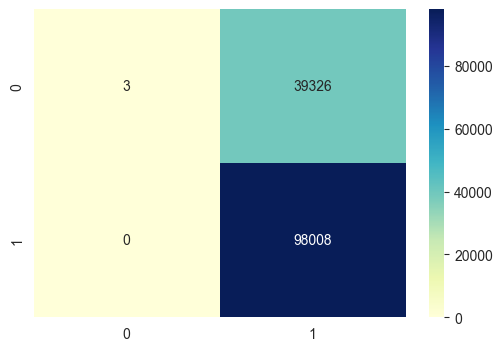

In [37]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4)#n_estimators=80,criterion='gini',max_depth=9,min_samples_split=12
apply_model(rf,x_train,x_test,y_train,y_test, create_heatmap=True)

Predictions
 [0 1 0 ... 1 1 1]
Training Score 0.9808038173923385
Testing Score 0.9662509010681753
Confusion Matrix
 [[35611  3459]
 [ 1176 97091]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     39070
           1       0.97      0.99      0.98     98267

    accuracy                           0.97    137337
   macro avg       0.97      0.95      0.96    137337
weighted avg       0.97      0.97      0.97    137337



<Figure size 640x480 with 0 Axes>

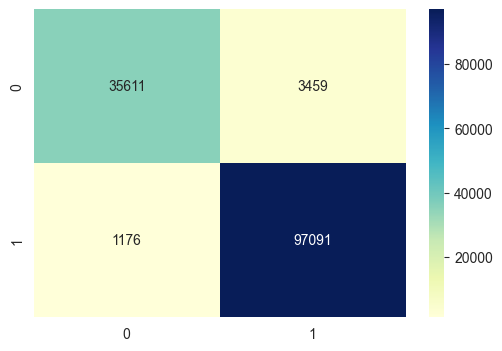

In [68]:
lr = LogisticRegression(solver='liblinear')#solver='liblinear'
apply_model(lr,x_train,x_test,y_train,y_test, create_heatmap=True)

Predictions
 ['good' 'bad' 'good' ... 'good' 'good' 'good']
Training Score 0.8084580676635704
Testing Score 0.8063449762263629
Confusion Matrix
 [[13072 26257]
 [  339 97669]]
Classification Report
               precision    recall  f1-score   support

         bad       0.97      0.33      0.50     39329
        good       0.79      1.00      0.88     98008

    accuracy                           0.81    137337
   macro avg       0.88      0.66      0.69    137337
weighted avg       0.84      0.81      0.77    137337



<Figure size 640x480 with 0 Axes>

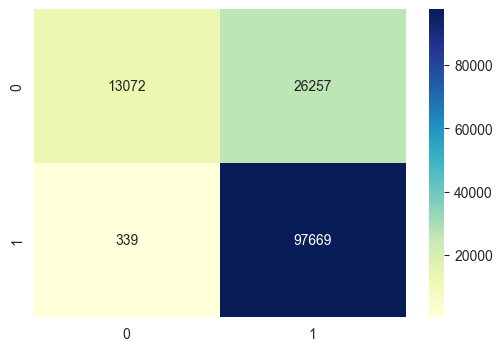

In [40]:
sv = SVC(kernel='linear',C=0.0001)#kernel='linear',C=0.1
apply_model(sv,x_train,x_test,y_train,y_test, create_heatmap=True)

In [70]:
lr.score(x_test,y_test)

0.9662509010681753

In [71]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [72]:
x_train, x_test, y_train, y_test = train_test_split(phish_data.URL, phish_data.Label)

In [74]:
pipeline_ls.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [76]:
pipeline_ls.score(x_train,y_train) 

0.9805465414590459

Predictions
 [0 1 1 ... 1 0 1]
Training Score 0.9805465414590459
Testing Score 0.966964474249474
Confusion Matrix
 [[35770  3410]
 [ 1127 97030]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     39180
           1       0.97      0.99      0.98     98157

    accuracy                           0.97    137337
   macro avg       0.97      0.95      0.96    137337
weighted avg       0.97      0.97      0.97    137337



<Figure size 640x480 with 0 Axes>

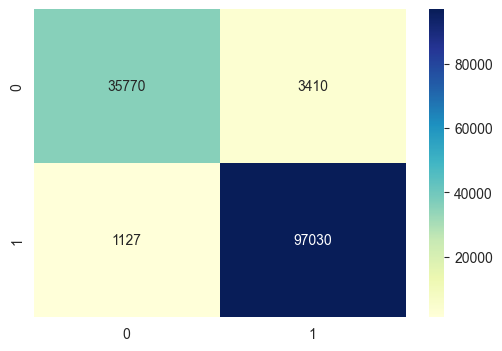

In [77]:
apply_model(pipeline_ls,x_train,x_test,y_train,y_test, create_heatmap=True)

In [78]:
pickle.dump(pipeline_ls,open('model.pkl','wb'))

In [80]:
loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.score(x_train,y_train)
print(result)

0.9805465414590459


In [81]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('model.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

[0 0 0 0]
******************************
[1 1 1 1]
